In [1]:
import pandas as pd

# Download papers from PMC FTP server

In [2]:
print("Downloading papers from PMC FTP Server and PMC_Ids table")
%run download_from_pmc_ftp.ipynb

already downloaded: data/FTP_PUBMED_papers/comm_use.C-H.xml.tar.gz
already downloaded: data/FTP_PUBMED_papers/comm_use.I-N.xml.tar.gz
already downloaded: data/FTP_PUBMED_papers/comm_use.O-Z.xml.tar.gz
already downloaded: data/FTP_PUBMED_papers/comm_use.A-B.xml.tar.gz
already downloaded: data/FTP_PUBMED_papers/non_comm_use.C-H.xml.tar.gz
already downloaded: data/FTP_PUBMED_papers/non_comm_use.I-N.xml.tar.gz
already downloaded: data/FTP_PUBMED_papers/non_comm_use.O-Z.xml.tar.gz
already downloaded: data/FTP_PUBMED_papers/non_comm_use.A-B.xml.tar.gz
already downloaded: data/PMC_ids/PMC-ids.csv.gz


# Read list of DOIs (cited papers) to analyze.

### Select source to get the DOIs
Below you can add a list of DOIs directly in the notebook or specify a file where the DOIs are recorded. As an example we include 'DOI_1000citations.csv'. This file contains a table with DOIs of papers that have received 1000 citations. It includes 2 columns, one with an index, another with the DOI. This file has been generated with "most_cited.ipynb". 

In [3]:
from ipywidgets import widgets

selection = widgets.Select(
    options=['Notebook', 'File'],
    value='Notebook',
    # rows=10,
    description='DOIs from: ',
    disabled=False
)

selection


A Jupyter Widget

### Provide list of DOIs

Below you can add a list of DOIs directly in the notebook or specify a file where the DOIs are recorded. As an example we include 'DOI_1000citations.csv'. This file contains a table with DOIs of papers that have received 1000 citations. It includes 2 columns, one with an index, another with the DOI. This file has been generated with "most_cited.ipynb". 

In [4]:
# a. DOIs from Notebook 
# As an example of DOI we suggest a highly cited paper 10.1126/science.1179052 that was retracted.
# This is the DOI we analyse in our blog.
DOI_list = ["10.1126/science.1179052"] 
ds_name = 'DOI_cited_science_1179052_retracted'

# b. DOIs from File
file_to_read = 'DOIs_1000times.csv' #file with cited DOIs
out_csv = 'DOI_cited_1000times_papers_citing'

if selection.value == 'File':
    df_info_doi = pd.read_csv(file_to_read, sep='\t', header = None, encoding='utf-8')
    DOI_list = df_info_doi[1].tolist()[10:15]  # limiting the number of DOIs analysed HEEEEEERE!!!!!!
    ds_name = out_csv
    print("List of DOIs read from ", file_to_read, ": \n ", DOI_list)
else:
    print("List of DOIs from Notebook: \n", DOI_list)

%store DOI_list
%store ds_name


List of DOIs from Notebook: 
 ['10.1126/science.1179052']
Stored 'DOI_list' (list)
Stored 'ds_name' (str)


# Find papers in FTP_PUBMED citing these DOIs

In [5]:
%run get_papers.ipynb

10.1126/science.1179052
data/FTP_PUBMED_papers/comm_use.A-B.xml.tar.gz
data/FTP_PUBMED_papers/comm_use.C-H.xml.tar.gz
data/FTP_PUBMED_papers/comm_use.I-N.xml.tar.gz
data/FTP_PUBMED_papers/comm_use.O-Z.xml.tar.gz
data/FTP_PUBMED_papers/non_comm_use.A-B.xml.tar.gz
data/FTP_PUBMED_papers/non_comm_use.C-H.xml.tar.gz
data/FTP_PUBMED_papers/non_comm_use.I-N.xml.tar.gz
data/FTP_PUBMED_papers/non_comm_use.O-Z.xml.tar.gz
Data saved to data/analysis/DOI_cited_science_1179052_retracted.tsv

 Number of papers found citing each DOI:
10.1126/science.1179052 		 43
Preprocessing data: removing random spaces.
wrote to: data/analysis/DOI_cited_science_1179052_retracted_prep.tsv


# Analyse file containing papers citing a particular DOI.

Analyse file containing papers citing a particular DOI. This DOI can be read from a file (the one used in get_papers) or directly introduced in a list. It generates a dataframe containing the following information:

dataframe['cited_DOI', 'citing_DOI', 'reference_id', 'introduction_found', 
   'cited_in_introduction', 'maintext_found', 'cited_in_maintext', 
   'discussion_found', 'cited_in_discussion', 'conclusions_found', 
   'cited_in_conclusions', 'sentence_citing_intro', 
   'sentence_citing_maintext', 'sentence_citing_discussion', 
   'sentence_citing_conclusions']

where:

   - 'reference_id' is the number of reference of the cited paper in a particular paper.
   - 'introduction_found', 'maintext_found', 'discussion_found' and 'conclusions_found' get True/False value depending on whether a particular section has been found.
   - 'cited_in_introduction', 'cited_in_maintext', 'cited_in_discussion', 'cited_in_conclusions' get True/False values depending on whether the paper is cited in these sections.
   - 'sentence_citing_intro', 'sentence_citing_maintext', 'sentence_citing_discussion', 'sentence_citing_conclusions' are the sentences in each section where the paper is cited.

### Times each DOI has been cited in a particular section.


Stored 'minimun_number_citations' (int)
Stored 'DOI_cited_list_index' (int)
[nltk_data] Downloading package punkt to /home/sherlock/nltk_data...
[nltk_data]   Package punkt is already up-to-date!

index in list: 0	 DOI: 10.1126/science.1179052
Number of papers found citing the DOI:   39
(Taking into account only those in which the code has found a particular section citing)
Wrote to: data/analysis/DOI_cited_science_1179052_retracted_sections.tsv
Wrote to: data/analysis/DOI_cited_science_1179052_retracted_hist.tsv

 DOIs with the required minimum number of citations found of 10: 



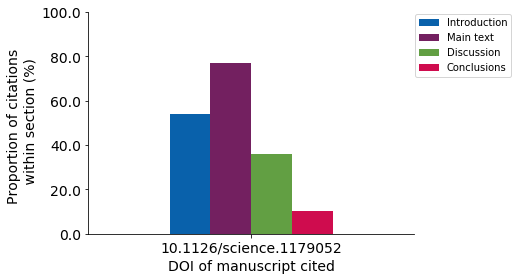


index in list: 0	 DOI: 10.1126/science.1179052
Number of papers found citing the DOI:   39
(Taking into account only those in which the code has found a particular section citing)


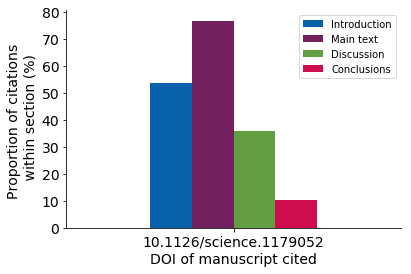

In [12]:
# We set a threshold of minimum of a minimun number of papers found citing the DOI for
# the cited paper to be considered:
minimun_number_citations = 10
%store minimun_number_citations 

# We also willplot the analysis for a particular cited paper from the list of DOIs
# Set DOI_cited_list_number to a value out of the list lenght range to skip (e.g. -1):
DOI_cited_list_index = 0
%store DOI_cited_list_index 


%run analyse_papers.ipynb

# Frequency analysis, representative sentences citing a particular paper and sentiment analysis of the sentences with NLTK.

In [13]:
"""
Select file containing 
dataframe['cited_DOI', 'citing_DOI', 'reference_id', 'introduction_found', 'cited_in_introduction', 'maintext_found', 'cited_in_maintext', 'discussion_found', 'cited_in_discussion', 'conclusions_found', 'cited_in_conclusions', 'sentence_citing_intro', 'sentence_citing_maintext', 'sentence_citing_discussion', 'sentence_citing_conclusions']
and a particular 'cited_DOI' to analyse.
"""

cited_DOI_to_analyse = "10.1126/science.1179052"
file_df = 'DOI_cited_science_1179052_retracted'

%store file_df
%store cited_DOI_to_analyse

Stored 'file_df' (str)
Stored 'cited_DOI_to_analyse' (str)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sherlock/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sherlock/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
cited_DOI:  ['10.1126/science.1179052']

------------- ANALYSIS INTRODUCTION -----------
Most frequent words:  ['cfs', 'patients', 'syndrome', 'virus', 'xmrv']
Frequent words included:  [0, 0, 0, 4, 5, 6, 0, 3, 0, 0, 0, 4, 4, 5, 0, 6, 3, 5, 0, 1, 2]
Maximum words in the same sentence  =  6

 Representative sentence:
17,"['<sec><title>Introduction</title><p>Reports of a newly-discovered gammaretrovirus (xenotropic murine leukemia virus-related virus; XMRV) in patients diagnosed with prostate cancer [<xref ref-type=""bibr"" rid=""B1"">1</xref>,<xref ref-type=""bibr"" rid=""B2"">2</xref>] and chronic fatigue syndrome (CFS) [<xref ref-type=""bibr"" rid=""B3"">3</xref>] have attracted the attention o

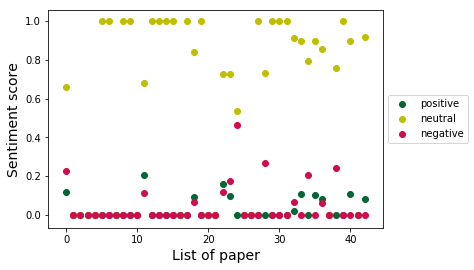

In [14]:
# The number of most frequent words or bigrams we will look for in the sentences is defined
# in words_frec_analysis_get_sentence.analysis module. Set by default to 5.

%run find_word_freq_readfiles.ipynb

### Sentiment analysis based in papers citing a retracted work.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sherlock/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
The code analysis papers citing another one that has been retracted. It takes papers that triggered the retraction and classify them as highly_critical. Papers published a year before the first highly_critical paper are classified as non_critical. Papers published after the highly_critical papers are classified as critical (they are not used in the analysis later on because they may contain mixed criticism). Date of publication of the papers are taken from the “PMC-ids.csv.gz” file, available through the PMC FTP service: https://www.ncbi.nlm.nih.gov/pmc/pmctopmid/ (Downloaded in data/PMC_ids folder)

 We now take all the sentences citing a particular DOI in all the papers disregarding its section. It shows that clustering algorithms such as PCA and TSNE fail if trying to cluster the sentences from non_critical and high_critical papers j

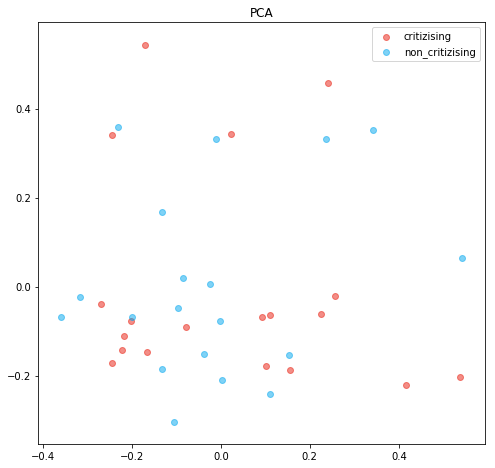

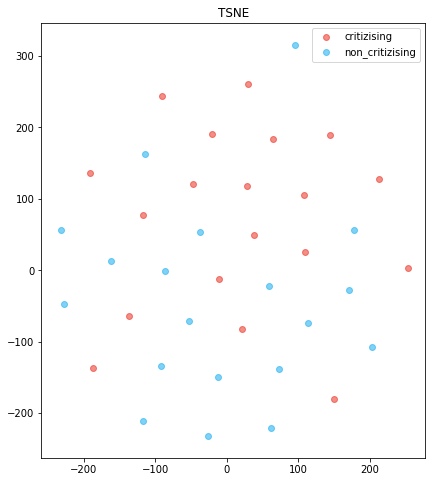

We now get all the sentences in the high_critical papers and a similar number of sentences from the non_critical papers. We get the words and bigrams used in the high_critical set and are not used in the non_critical set.

['appeared', 'association', 'carried', 'cells', 'chronic', 'concerning', 'fatigue', 'findings', 'found', 'inconsistent', 'isolation', 'levels', 'negative', 'paper', 'patients', 'previous', 'published', 'report', 'reporting', 'syndrome']
2,"['More recently, additional groups of samples from patients with prostate cancer have been examined for the presence of XMRV with both positive [<xref ref-type=""bibr"" rid=""B5"">5</xref>] and negative [<xref ref-type=""bibr"" rid=""B6"">6</xref>,<xref ref-type=""bibr"" rid=""B7"">7</xref>] results.</p><p>Very recently, a paper reporting the PCR detection of XMRV in PBMC from 68/101 patients with chronic fatigue syndrome (CFS) has been published [<xref ref-type=""bibr"" rid=""B8"">8</xref>].']"
['cell', 'compared', 'finding', 'inb

In [15]:
%run criticism_detection.ipynb